# Prediccion de Precios de Carros

Creacion de un modelo de Machine Learning para predecir los precios de los carros en el mercado estadounidense. El objetivo es ayudar a nuevos integrantes a comprender factores de precios importantes en este mercado.

# Seccion 1. Analisis y exploracion de los datos

## Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gestion de advertencias

In [3]:
import warnings

# ignora advertencias sobre funcionalidades que se van a dejar de usar
warnings.simplefilter(action='ignore', category=FutureWarning)

# ignora advertencias sobre problemas en tiempo de ejecucion
warnings.filterwarnings('ignore', category=RuntimeWarning)

## Cargar datos

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
# resumen por variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

> Las 26 variables estan libres de valores faltantes. Existen 205 registros

## Entendiendo las variables predictoras

### **Symboling**

Hace referencia al riesgo del auto y va en una escala de -2 a 3,siendo el -2 menos riesgoso y 3 mas riesgoso.

In [6]:
# Categorias de la variable Symboling
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [7]:
# porcentaje de las diferentes categorias de symboling
df['symboling'].value_counts(normalize=True)*100

 0    32.682927
 1    26.341463
 2    15.609756
 3    13.170732
-1    10.731707
-2     1.463415
Name: symboling, dtype: float64

- La mayoria de los carros son 0, 1, 2, es decir con un riesgo considerable

- Son pocos los carros con bajo riesgo (-2)

### **Aspiration**

Es una propiedad del motor (de combustion interna) que muestra si la ingesta de oxigeno es estandar (presion atmosferica) o mediante turbocompresor (entrada de oxigeno a presion)

In [8]:
# categorias de la variable aspiration
df['aspiration'].value_counts(normalize=True)*100

std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64

- El 81.9% de los carros son de ingesta de oxigeno estandar
- El 18.1% son de turbocompresor

### **Drivewheel**

Hace referencia a la rueda de traccion del carro: rueda delantera (frontwheel), rueda trasera (rear wheel) o traccion en las cuatro ruedas (four-wheel drive).

In [9]:
df['drivewheel'].value_counts(normalize=True)*100

fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64

- El 58.3% de los carros son de traccion delantera
- El 37.1% son de traccion trasera
- El 4.4% son de traccion en las 4 ruedas.

### **Wheelbase**

Es la distancia entre el centro de las ruedas delanteras y traseras.

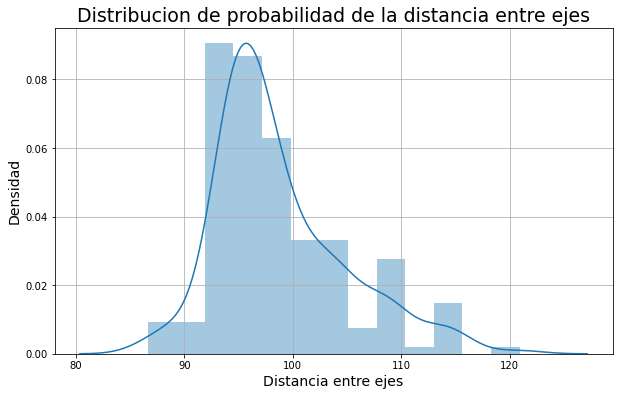

In [10]:
# como es una variable numerica, veamos su distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['wheelbase'])
plt.grid(True)
plt.xlabel('Distancia entre ejes', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Distribucion de probabilidad de la distancia entre ejes', fontsize= 19);

- La mayoria de los carros tienen una distancia entre ejes entre 92.5 y 97.5 

### **Curbweight**

Peso del carro sin ocupantes ni equipajes

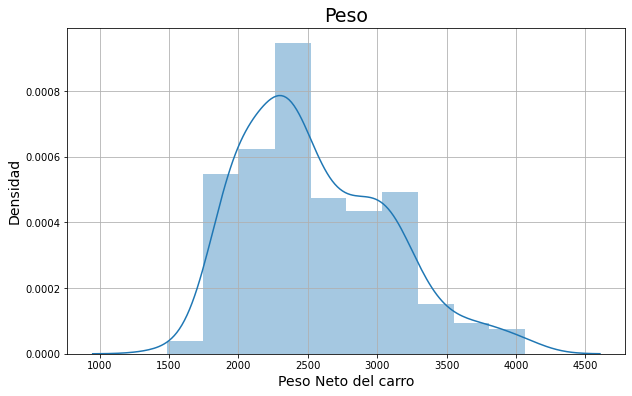

In [11]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['curbweight'])
plt.grid(True)
plt.xlabel('Peso Neto del carro', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Peso', fontsize= 19);

- La mayoria de los carros pesan entre 2000 y 2500.

### **Stroke**

Es el volumen del motor (distancia recorrida por el piston en cada ciclo)

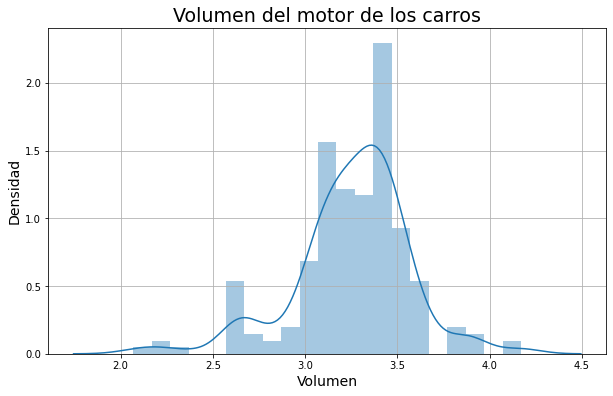

In [12]:
# distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['stroke'])
plt.grid(True)
plt.xlabel('Volumen', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Volumen del motor de los carros', fontsize= 19);

- Hay una gran cantidad de carros con volumen de motor de 3.4.

### **Compression ration**

Relacion de volumen de la camara de compresion de mayor a menor capacidad

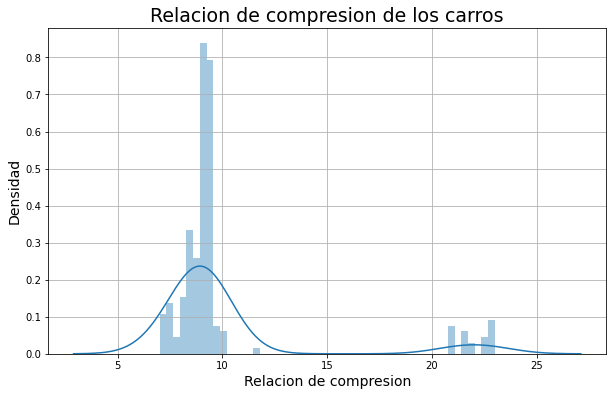

In [13]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['compressionratio'])
plt.grid(True)
plt.xlabel('Relacion de compresion', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Relacion de compresion de los carros', fontsize= 19);

- La mayoria de los carros tienen una relacion de compresion de 7.5 a 10.0
- Hay unos pocos con relacion de compresion entre 20 y 22.5
- En estos dos rangos se encuentran todos los carros.

## Entendiendo variable objetivo

Estamos interesados en predecir el precio de los carros, por tanto, la variable objetivo es *Price*.  Vamos a visualizar la variable en un histograma y en un grafico de densidad.

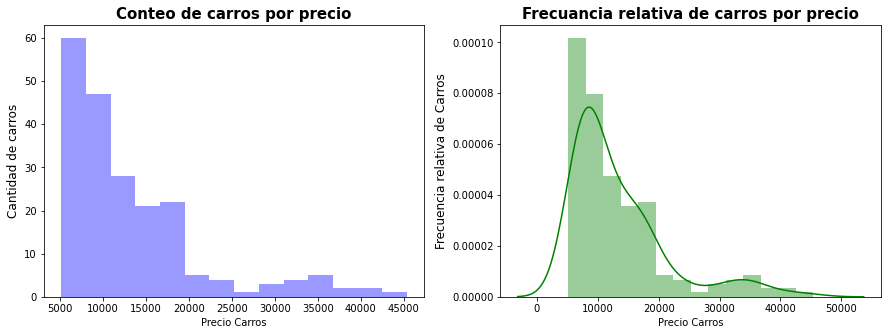

In [16]:
# tamano de los graficos y cantidad de grilla
fig, ax= plt.subplots(1,2,figsize=(15,5))

# Histograma
sns.distplot(df['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Precio Carros')
ax[0].set_ylabel('Cantidad de carros',size=12)
ax[0].set_title('Conteo de carros por precio',size=15,weight="bold")

# Grafico de densidad
sns.distplot(df['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Precio Carros')
ax[1].set_ylabel('Frecuencia relativa de Carros', size=12)
ax[1].set_title('Frecuencia relativa de carros por precio', size=15, weight='bold');

- El precio tiene un sesgo positivo. Sin embargo, la mayoria de los carros tienen precios bajos.

- Entre 105 y 107 carros tienen un precio inferior a 10.000. Representan mas del 50%.

- Entre 68 y 70 carros tienen precio entre 10.000 y 20.000. Representan cerca del 35%.

- Alrededor del 85% de los carro tienen un precio entre 5.000 y 20.000 dolares.

- El grafico derecho sugiere que hay 2 distribuciones, una para carros con precios entre 5.000 y 25.000 y otra para carros de mas de 25.000

# Seccion 2. Exploracion de los Datos

Veamos como se relacionan las variables predictoras con la variable objetivo.

In [17]:
# seleccionar variables predictoras numericas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

Eliminamos la variable *symboling* debido a que es de tipo categorica y *car_ID* ya que es un indice de los registros

In [18]:
df_numeric = df_numeric.drop(['symboling', 'car_ID'], axis=1)
df_numeric.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

Cruzemos todas las variables entre si mediante graficos de dispersion para observar el tipo de relacion con la variable objetivo.

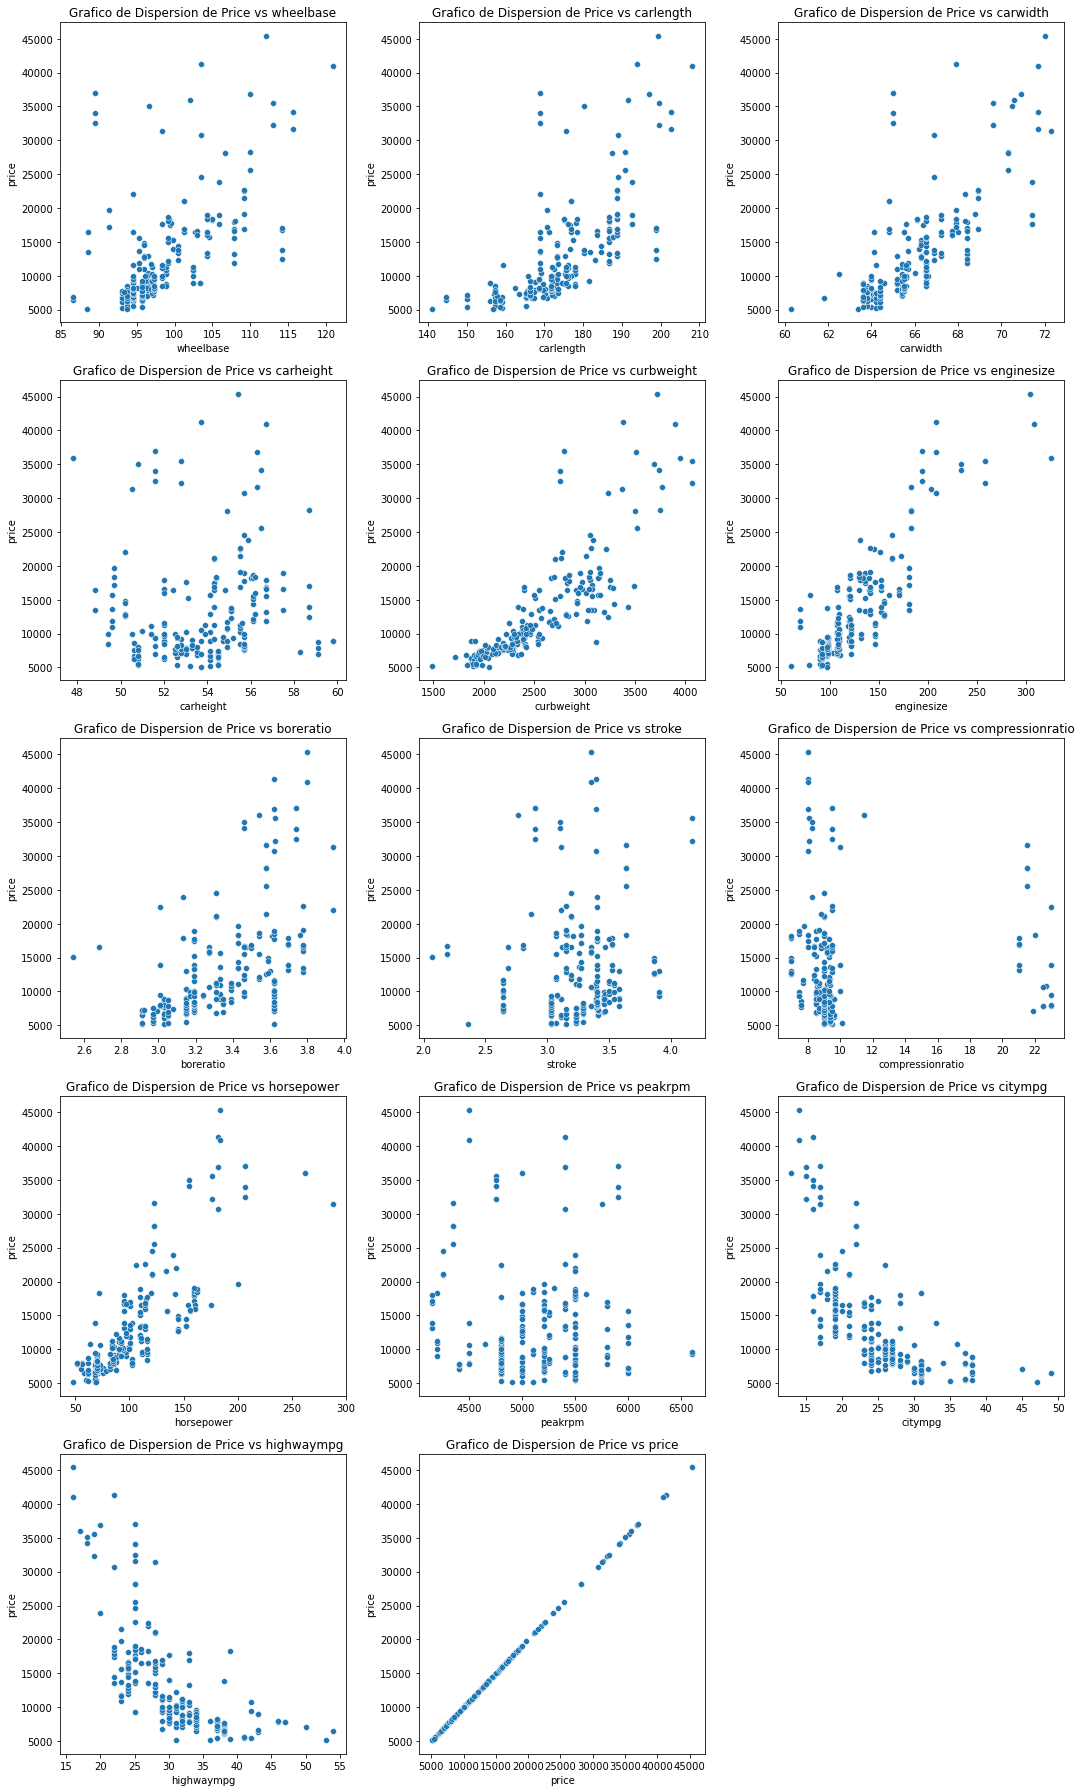

In [25]:
# Número de columnas predictoras
num_cols = len(df_numeric.columns) - 1
# Número de filas necesarias para una grilla de 3 columnas
num_rows = (num_cols + 2) // 3  
# Crear una grilla de subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows)) 

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):  
    # grafico de dispersion de cada variable objetivo con price    
    sns.scatterplot(x=df_numeric[col], y=df_numeric['price'], ax=axes[i])
    axes[i].set_title(f'Grafico de Dispersion de Price vs {col}')

# Eliminar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()